In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/binary_featk_aci.csv")

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [ ]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


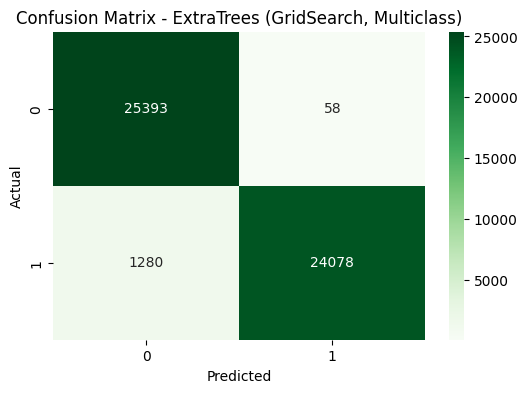

{'Best Params': {'max_depth': 30, 'n_estimators': 150}, 'Accuracy': 0.9736660827806097, 'Precision': 0.9748041739531674, 'Recall': 0.973621972092882, 'F1 Score': 0.9736484314812057}


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reduced parameter grid (max 3 options per hyperparameter)
param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 15, 30]
}

# GridSearchCV
grid_et = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_et,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_et.fit(X_train, y_train)
best_et = grid_et.best_estimator_
y_pred_et = best_et.predict(X_test)

# Metrics (multiclass)
accuracy = accuracy_score(y_test, y_pred_et)
precision = precision_score(y_test, y_pred_et, average='macro')
recall = recall_score(y_test, y_pred_et, average='macro')
f1 = f1_score(y_test, y_pred_et, average='macro')

# Save results
results["ExtraTrees"] = {
    "Best Params": grid_et.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
class_labels = np.unique(y)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_et, labels=class_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTrees (GridSearch, Multiclass)")
plt.savefig("confusion_matrix_extratrees_gridsearch_multiclass.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["ExtraTrees"])


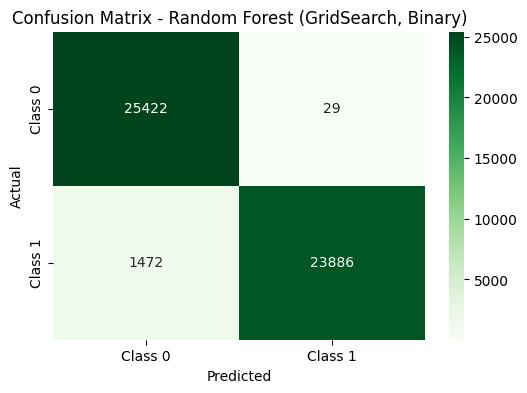

{'Best Params': {'max_depth': 20, 'n_estimators': 75}, 'Accuracy': 0.9704579897262297, 'Precision': 0.9987873719422956, 'Recall': 0.9419512579856456, 'F1 Score': 0.9695370689830131}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 12, 20]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluation metrics (binary classification)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')
recall = recall_score(y_test, y_pred_rf, average='binary')
f1 = f1_score(y_test, y_pred_rf, average='binary')

# Save results
results["RandomForest"] = {
    "Best Params": grid_search.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (GridSearch, Binary)")
plt.savefig("confusion_matrix_randomforest_gridsearch_binary.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["RandomForest"])


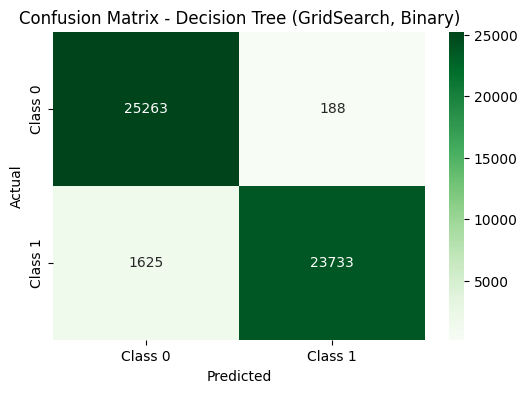

{'Best Params': {'max_depth': 15, 'min_samples_split': 2}, 'Accuracy': 0.9643173453522014, 'Precision': 0.9921407967894319, 'Recall': 0.9359176591213818, 'F1 Score': 0.9632094807118651}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define updated parameter grid
param_grid_dt = {
    'max_depth': [3, 9, 15],
    'min_samples_split': [2, 10, 20]
}

# Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_dt.fit(X_train, y_train)

# Get best model and predictions
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='binary')
recall = recall_score(y_test, y_pred_dt, average='binary')
f1 = f1_score(y_test, y_pred_dt, average='binary')

# Save results
results["DecisionTree"] = {
    "Best Params": grid_dt.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (GridSearch, Binary)")

plt.savefig("confusion_matrix_decisiontree_gridsearch_binary.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["DecisionTree"])


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


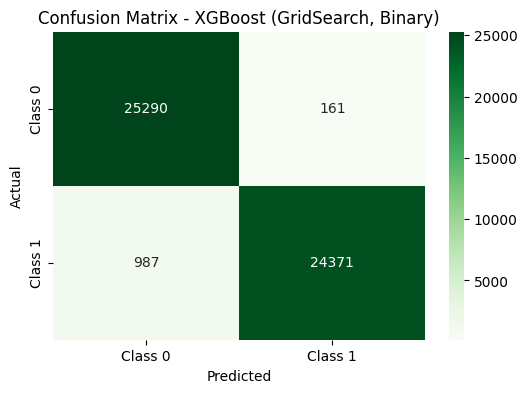

{'Best Params': {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200}, 'Accuracy': 0.9774055777519731, 'Precision': 0.9934371433230067, 'Recall': 0.9610773720324947, 'F1 Score': 0.9769893766285829}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Updated parameter grid
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV setup with eval_metric='error' for classification error rate
grid_xgb = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='error'),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='binary')
recall = recall_score(y_test, y_pred_xgb, average='binary')
f1 = f1_score(y_test, y_pred_xgb, average='binary')

# Save results
results["XGBoost"] = {
    "Best Params": grid_xgb.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (GridSearch, Binary)")

plt.savefig("confusion_matrix_xgboost_gridsearch_binary.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["XGBoost"])


In [ ]:
print("All Results:", results["XGBoost"])


All Results: {'Best Params': {'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200}, 'Accuracy': 0.9774055777519731, 'Precision': 0.9934371433230067, 'Recall': 0.9610773720324947, 'F1 Score': 0.9769893766285829}


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 101664, number of negative: 101571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4777
[LightGBM] [Info] Number of data points in the train set: 203235, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500229 -> initscore=0.000915
[LightGBM] [Info] Start training from score 0.000915


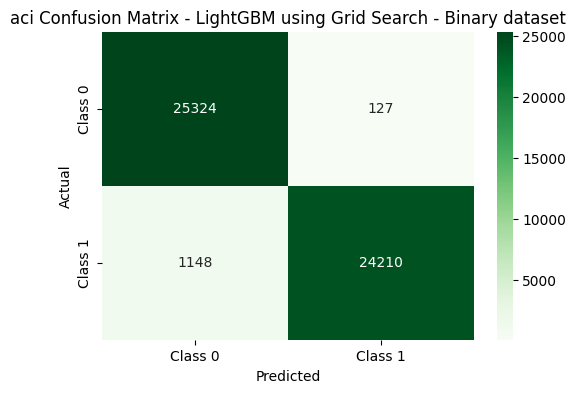

{'Best Params': {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 60}, 'Accuracy': 0.9749060205869039, 'Precision': 0.9947816082508115, 'Recall': 0.9547282908746747, 'F1 Score': 0.9743434953214609}


In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'num_leaves': [20, 40, 60],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize LGBMClassifier
lgb = LGBMClassifier(random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_lgb_model = grid_search.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb, average='binary')
recall = recall_score(y_test, y_pred_lgb, average='binary')
f1 = f1_score(y_test, y_pred_lgb, average='binary')

# Save results
results["Lightgbm"] = {
    "Best Params": grid_search.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("aci Confusion Matrix - LightGBM using Grid Search - Binary dataset")
plt.savefig("aci_confusion_matrix_lightgbm_gridsearch_binary.png", dpi=800)
plt.show()
plt.close()

# Print Results
print(results["Lightgbm"])


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00


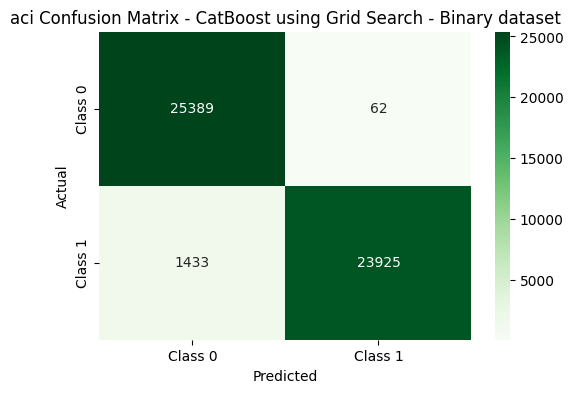

{'Best Params': {'depth': 8, 'iterations': 200, 'learning_rate': 0.2}, 'Accuracy': 0.9705760790411148, 'Precision': 0.9974152666027432, 'Recall': 0.9434892341667324, 'F1 Score': 0.9697031107508359}


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid for CatBoost
param_grid_cat = {
    'iterations': [100, 150, 200],
    'depth': [6, 7, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_cat = GridSearchCV(
    estimator=CatBoostClassifier(verbose=0, random_state=42),
    param_grid=param_grid_cat,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_cat.fit(X_train, y_train)

# Get best model and predictions
best_cat = grid_cat.best_estimator_
y_pred_cat = best_cat.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_cat)
precision = precision_score(y_test, y_pred_cat, average='binary')
recall = recall_score(y_test, y_pred_cat, average='binary')
f1 = f1_score(y_test, y_pred_cat, average='binary')

# Save results
results["CatBoost"] = {
    "Best Params": grid_cat.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("aci Confusion Matrix - CatBoost using Grid Search - Binary dataset")

plt.savefig("aci_confusion_matrix_catboost_gridsearch_binary.png", dpi=800)
plt.show()
plt.close()

# Print results
print(results["CatBoost"])


# **Comparison**

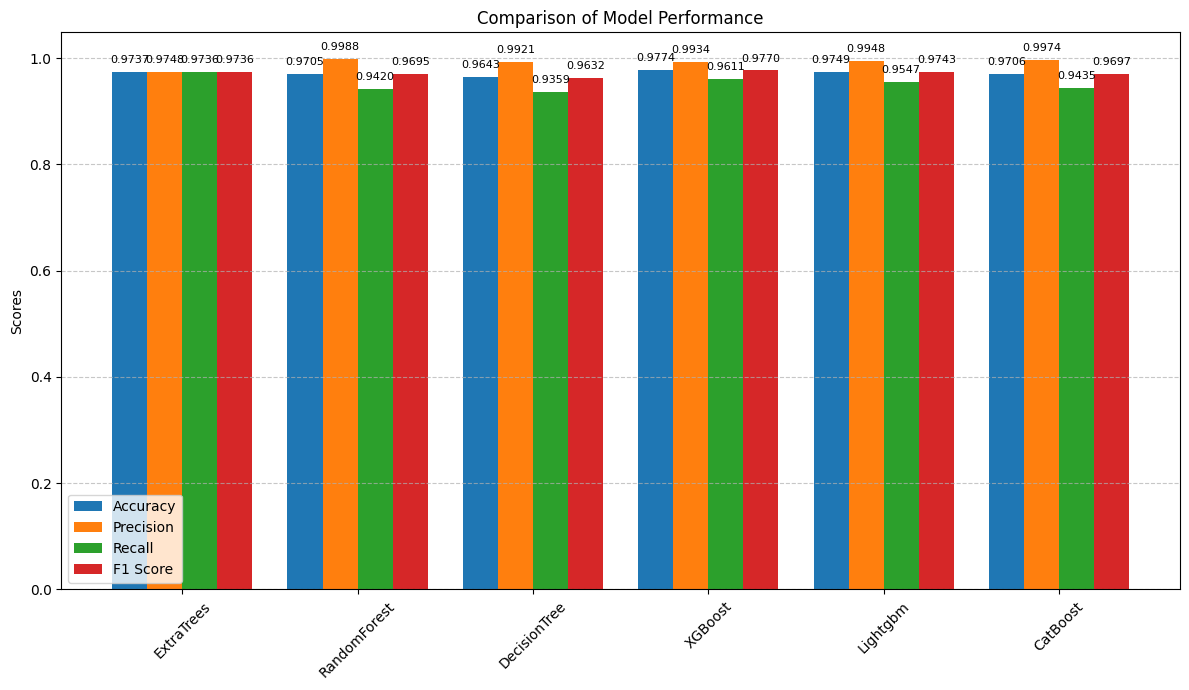

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = list(results.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Prepare data for plotting
data = {metric: [results[model][metric] for model in models] for metric in metric_names}

# Plotting
x = np.arange(len(models))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Create bars for each metric
rects1 = ax.bar(x - 1.5*width, data['Accuracy'], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, data['Precision'], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, data['Recall'], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, data['F1 Score'], width, label='F1 Score')

# Labels and Title
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show values on bars
def autolabel(rects):
    """Attach a text label above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for rects in [rects1, rects2, rects3, rects4]:
    autolabel(rects)

fig.tight_layout()

# Save the plot with 800 dpi
plt.savefig('aci_model_comparison_plot_usg_grid_binary_updated_final.png', dpi=800)

# Display the plot
plt.show()
